# Lab | Classification, Handling Imbalanced Data

## Lab Instructions

### Scenario

You are working as an analyst for an internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned in class.

Here is the list of steps to be followed (building a simple model without balancing the data):

#### Round 1
- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `churnData`.
- Check the datatypes of all the columns in the data. You will see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - Split the data into a training set and a test set.
  - Scale the features either by using normalizer or a standard scaler.
  - (optional)Fit a logistic Regression model on the training data.
  - Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.
 
#### Round 2
  - Fit a Decision Tree Classifier on the training data.
  - Check the accuracy on the test data.

#### Round 3
 -  apply K-fold cross validation on your models before and check the model score.
**Note**: So far we have not balanced the data.

#### Round 4
 - fit a Random forest Classifier on the data and compare the accuracy. 
 - tune the hyper paramters with gridsearch and check the results.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

---


## Importing libraries and data

In [71]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Round 1

In [3]:
data = pd.read_csv("data/DATA_Customer-Churn.csv")
churn_data = pd.DataFrame(data)
display(churn_data)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

     OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0                No          Yes               No          No          No   
1               Yes           No              Yes          No          No   
2               Yes          Yes               No          No          No   
3               Yes           No              Yes         Yes          No   
4                No           No               No          No          No   
...             ...          ...              ...         ...         ...   
7038            Yes           No              Yes         Yes         Yes   
7039             No          Yes              Yes          No         Yes   
7040            Yes           No               No          No          No   
7041             No           No               No          No          No   
7042            Yes           No              Yes         Yes         Yes   

     StreamingMovies        Contract  MonthlyCharges TotalCharges Churn  
0                 No  Month-to-month           29.85        29.85    No  
1                 No        One year           56.95       1889.5    No  
2                 No  Month-to-month           53.85       108.15   Yes  
3                 No        One year           42.30      1840.75    No  
4                 No  Month-to-month           70.70       151.65   Yes  
...              ...             ...             ...          ...   ...  
7038             Yes        One year           84.80       1990.5    No  
7039             Yes        One year          103.20       7362.9    No  
7040              No  Month-to-month           29.60       346.45    No  
7041              No  Month-to-month           74.40        306.6   Yes  
7042             Yes        Two year          105.65       6844.5    No  

[7043 rows x 16 columns]

## Data cleaning

### Datatypes

In [4]:
display(churn_data.dtypes)
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors = 'coerce')

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Duplicates

In [5]:
churn_data = churn_data.drop_duplicates()

### Null values

In [6]:
churn_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
churn_data["TotalCharges"] = churn_data["TotalCharges"].fillna(churn_data["TotalCharges"].mean())


### Churn column


In [8]:
churn_data['Churn'] = churn_data['Churn'].map({'Yes': 1, 'No': 0})
churn_data['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 6994, dtype: int64

## Preprocessing

### Splitting data

In [9]:
selected_features = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']

X = pd.DataFrame(churn_data[selected_features])
y = churn_data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Preprocessing y

In [10]:
np.unique(y, return_counts=True)

(array([0, 1]), array([5144, 1850]))

In [11]:
y.value_counts()

Churn
0    5144
1    1850
Name: count, dtype: int64

### Standardising data

array([[<Axes: title={'center': 'Churn'}>]], dtype=object)

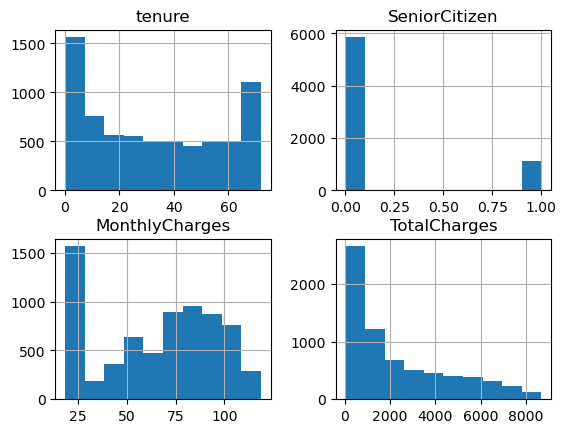

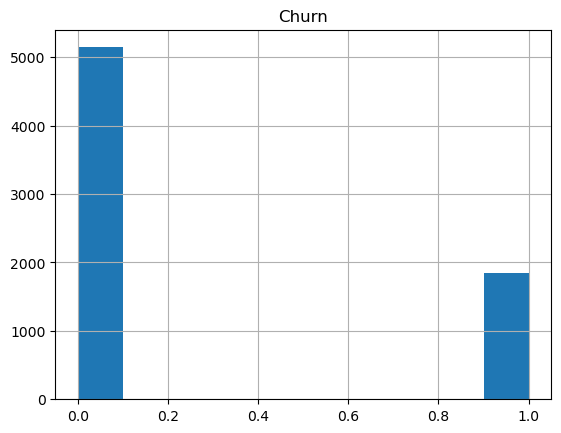

In [12]:
X.hist()
pd.DataFrame(y).hist()

#### MinMax scaler

In [13]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = pd.DataFrame(mm_scaler.transform(X_train))
X_test_mm = pd.DataFrame(mm_scaler.transform(X_test))

#### Standard scaler

In [14]:
s_scaler = StandardScaler()
s_scaler.fit(X_train)
X_train_s = pd.DataFrame(s_scaler.transform(X_train))
X_test_s = pd.DataFrame(s_scaler.transform(X_test))

## Models

### Logistic regression

In [15]:
log_model = LogisticRegression() 


log_model.fit(X_train_mm, y_train)

y_pred_train_log = log_model.predict(X_train_mm)
y_pred_test_log = log_model.predict(X_test_mm)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

Error_metric     Train      Test
0     Accuracy  0.792183  0.787879
1    Precision  0.660494  0.611594
2       Recall  0.457917  0.470982

#### Confusion matrix

Note: our aim is to predict customers that are likely to churn. We would most like to avoid false negatives (type 2 error) because not identifying a customer that is likely to churn is worse than incorrectly flagging a customer as a churn risk.

Therefore, wee want to keep recall as high as posible
recall TP/TP+FN

<b> Train

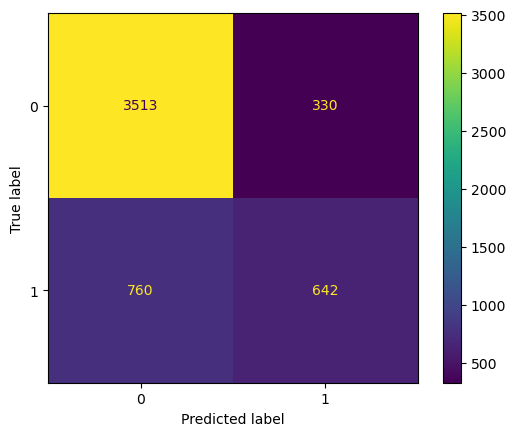

In [16]:
cm_train = confusion_matrix(y_train, y_pred_train_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

<b> Test

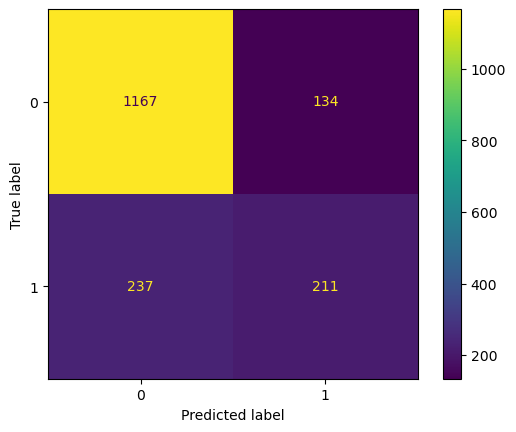

In [17]:
cm_test = confusion_matrix(y_test, y_pred_test_log, labels = log_model.classes_)
disp_test = ConfusionMatrixDisplay(cm_test)
disp_test.plot()

### KNN classification

In [18]:
model = KNeighborsClassifier(n_neighbors=3,weights='uniform') # declare we're using knn classification model
model.fit(X_train_s, y_train) # train model
y_pred = model.predict(X_test_s.values) # predict test
y_pred_train=model.predict(X_train_s.values) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

Error_metric     Train      Test
0     Accuracy  0.862154  0.759863
1    Precision  0.776691  0.533493
2       Recall  0.679743  0.497768

#### Confusion matrix

<b> Train

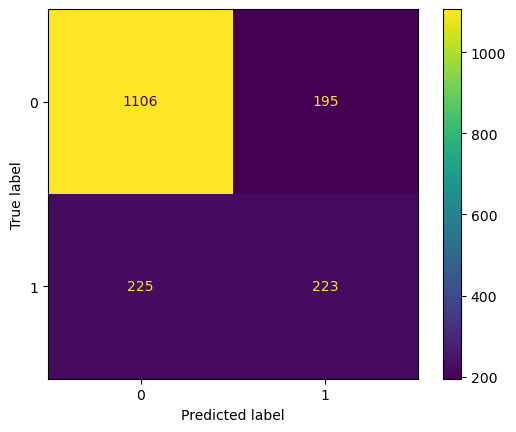

In [19]:
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## Function to evaluate classification model

In [20]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test



In [21]:
y_train = y_train.ravel()

y_test = y_test.ravel()

y_pred_test = y_test.ravel()


## calling the function
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

Error_metric  Train  Test
0     Accuracy   0.86  0.76
1    Precision   0.78  0.53
2       Recall   0.68  0.50

# Round 2

## Decision Tree

Note: our aim is to predict customers that are likely to churn. We would most like to avoid false negatives (type 2 error) because not identifying a customer that is likely to churn is worse than incorrectly flagging a customer as a churn risk.

Therefore, wee want to keep recall as high as posible
recall TP/TP+FN

In [22]:
# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

Error_metric  Train  Test
0     Accuracy   0.78  0.78
1    Precision   0.66  0.61
2       Recall   0.41  0.44

#### Confusion matrix

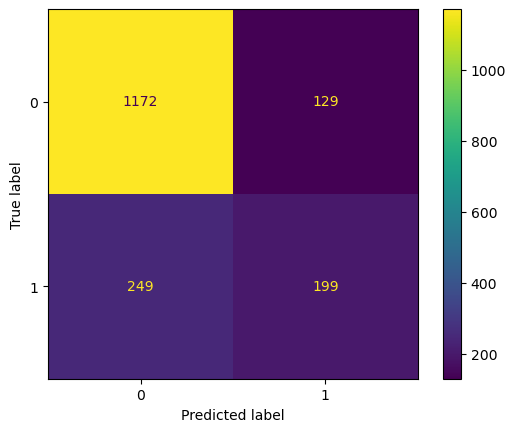

In [23]:
cm = confusion_matrix(y_test, y_pred_test_dt, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

#### Feature importance

<BarContainer object of 4 artists>

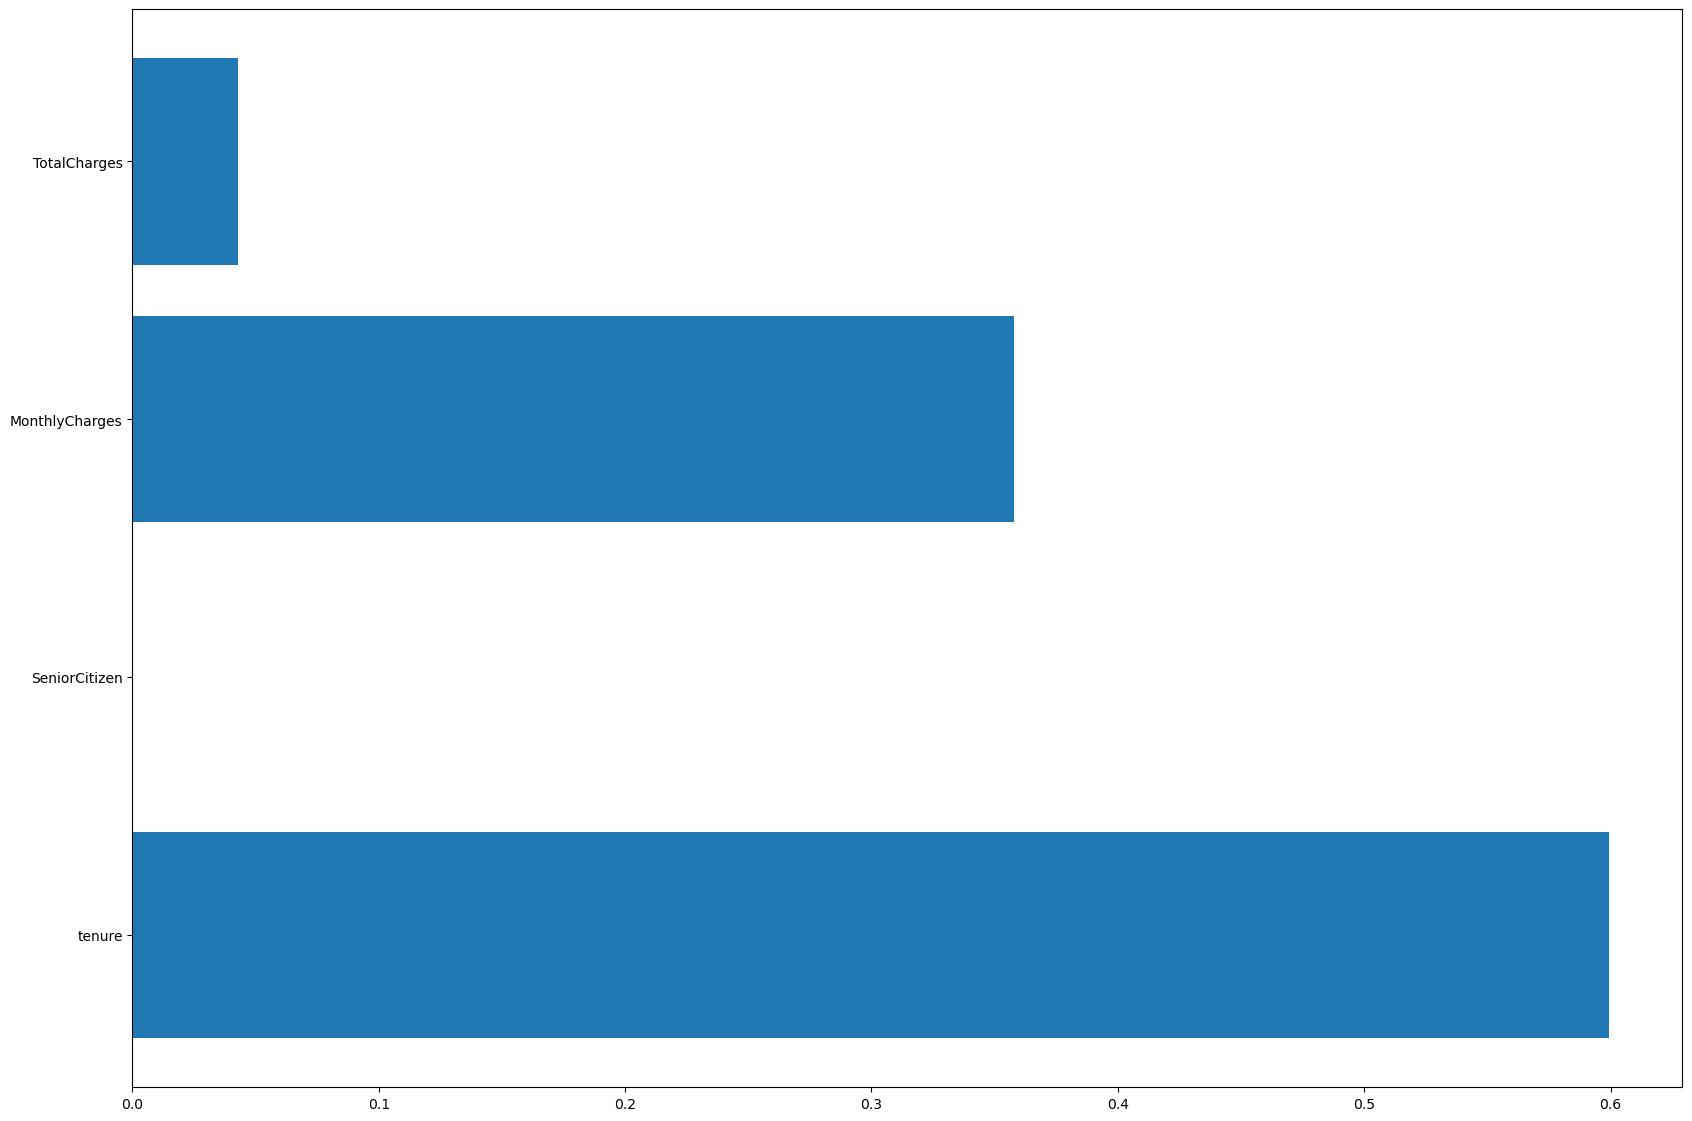

In [24]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

Tenure = 20
Monthly charges = 50
Total charges = 1000
Senior citizen = yes

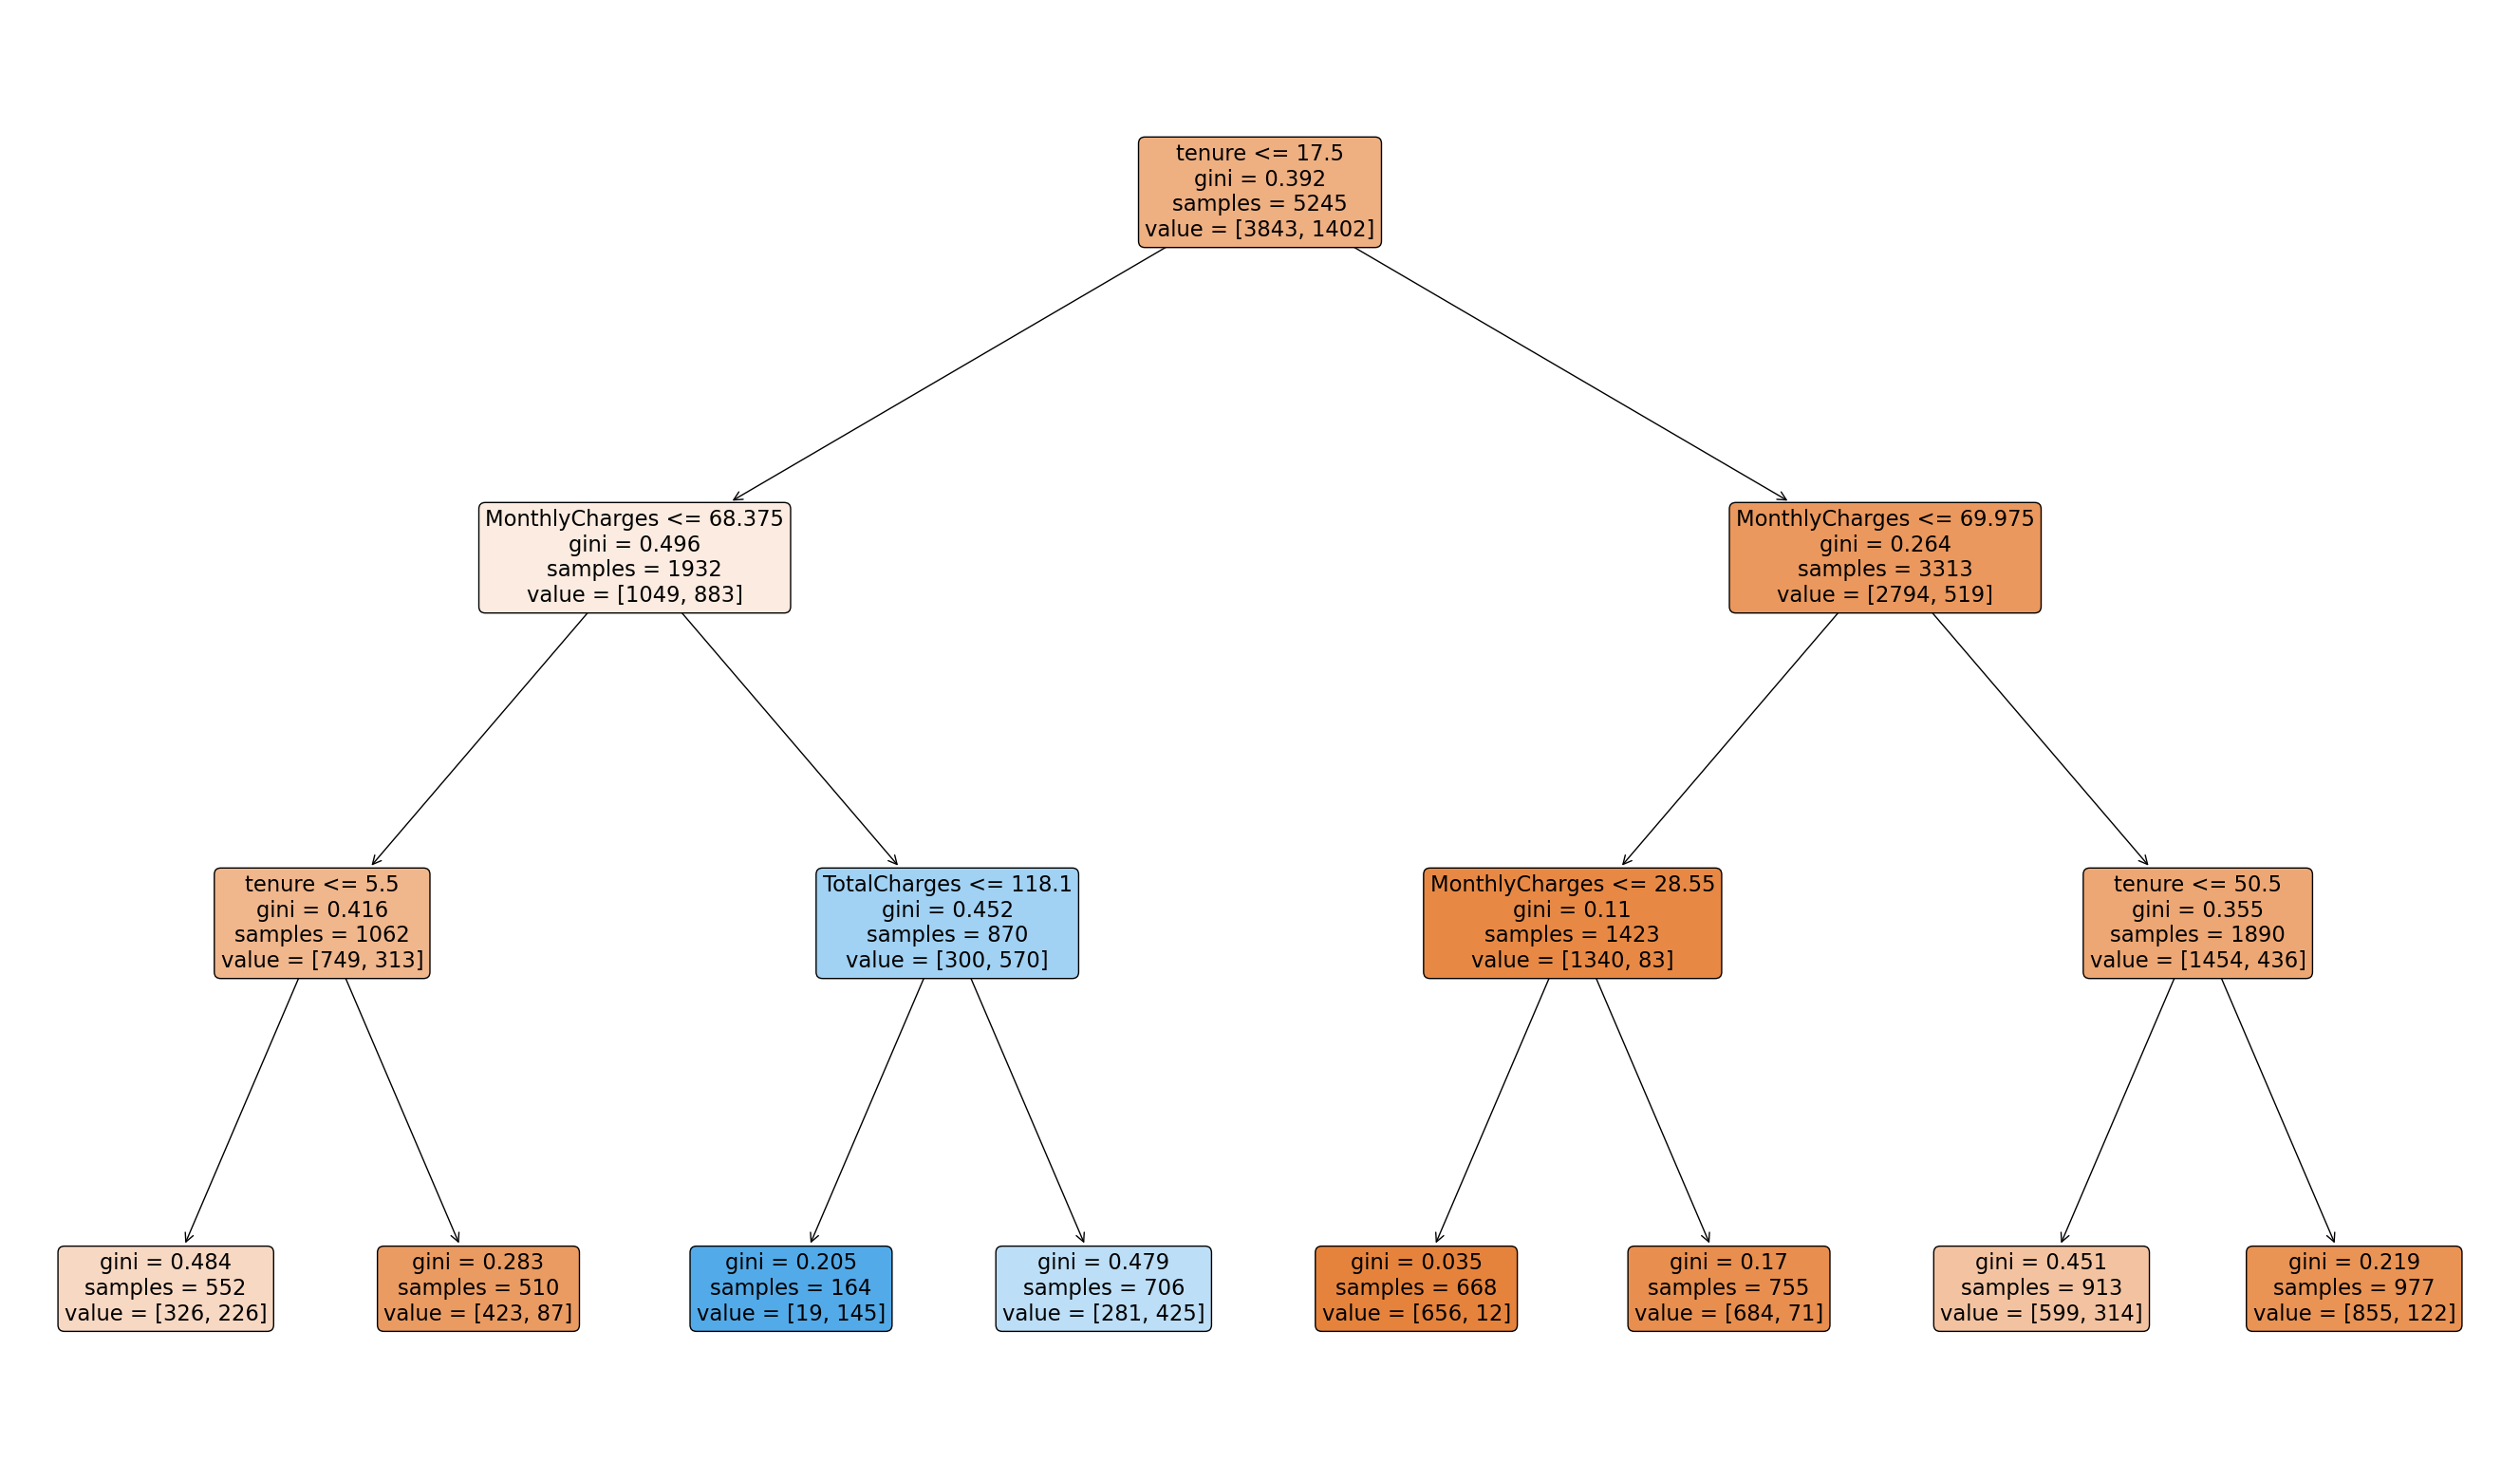

In [25]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=list(X.columns))
plt.show() 

## Function to train and test Decision Tree Classifier using different values for max_depth

In [26]:
# List of models to train and evaluate
max_depth_list = []
    
def multi_model_evaluation(max_depth_list,X_train,y_train,X_test,y_test):
    for depth_integer in max_depth_list:
        model = DecisionTreeClassifier(max_depth=depth_integer)
        model.fit(X_train, y_train)
        y_pred_train_dt = model.predict(X_train)
        y_pred_test_dt = model.predict(X_test)
        performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})
        print(f'metrics for max depth = {depth_integer}')
        display(performance_df)

In [27]:
max_depth_list = range(1, 100, 1)
max_depth_list

range(1, 100)

In [28]:
multi_model_evaluation(max_depth_list,X_train,y_train,X_test,y_test)

metrics for max depth = 1


/Users/jameskenny/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameskenny/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Error_metric  Train  Test
0     Accuracy   0.73  0.74
1    Precision   0.00  0.00
2       Recall   0.00  0.00

metrics for max depth = 2


Error_metric  Train  Test
0     Accuracy   0.78  0.78
1    Precision   0.66  0.61
2       Recall   0.41  0.44

metrics for max depth = 3


Error_metric  Train  Test
0     Accuracy   0.78  0.78
1    Precision   0.66  0.61
2       Recall   0.41  0.44

metrics for max depth = 4


Error_metric  Train  Test
0     Accuracy   0.78  0.78
1    Precision   0.66  0.61
2       Recall   0.41  0.44

metrics for max depth = 5


Error_metric  Train  Test
0     Accuracy   0.80  0.79
1    Precision   0.69  0.61
2       Recall   0.44  0.45

metrics for max depth = 6


Error_metric  Train  Test
0     Accuracy   0.80  0.78
1    Precision   0.68  0.58
2       Recall   0.51  0.48

metrics for max depth = 7


Error_metric  Train  Test
0     Accuracy   0.81  0.77
1    Precision   0.71  0.55
2       Recall   0.52  0.45

metrics for max depth = 8


Error_metric  Train  Test
0     Accuracy   0.83  0.76
1    Precision   0.74  0.53
2       Recall   0.54  0.45

metrics for max depth = 9


Error_metric  Train  Test
0     Accuracy   0.84  0.76
1    Precision   0.75  0.55
2       Recall   0.60  0.49

metrics for max depth = 10


Error_metric  Train  Test
0     Accuracy   0.85  0.76
1    Precision   0.80  0.54
2       Recall   0.61  0.48

metrics for max depth = 11


Error_metric  Train  Test
0     Accuracy   0.87  0.76
1    Precision   0.81  0.52
2       Recall   0.67  0.50

metrics for max depth = 12


Error_metric  Train  Test
0     Accuracy   0.89  0.75
1    Precision   0.86  0.52
2       Recall   0.69  0.47

metrics for max depth = 13


Error_metric  Train  Test
0     Accuracy   0.90  0.74
1    Precision   0.86  0.49
2       Recall   0.76  0.51

metrics for max depth = 14


Error_metric  Train  Test
0     Accuracy   0.92  0.73
1    Precision   0.88  0.48
2       Recall   0.80  0.51

metrics for max depth = 15


Error_metric  Train  Test
0     Accuracy   0.93  0.74
1    Precision   0.91  0.48
2       Recall   0.84  0.52

metrics for max depth = 16


Error_metric  Train  Test
0     Accuracy   0.94  0.73
1    Precision   0.92  0.47
2       Recall   0.86  0.50

metrics for max depth = 17


Error_metric  Train  Test
0     Accuracy   0.95  0.73
1    Precision   0.94  0.47
2       Recall   0.88  0.51

metrics for max depth = 18


Error_metric  Train  Test
0     Accuracy   0.96  0.72
1    Precision   0.96  0.45
2       Recall   0.90  0.50

metrics for max depth = 19


Error_metric  Train  Test
0     Accuracy   0.97  0.72
1    Precision   0.96  0.45
2       Recall   0.93  0.51

metrics for max depth = 20


Error_metric  Train  Test
0     Accuracy   0.98  0.72
1    Precision   0.96  0.46
2       Recall   0.95  0.52

metrics for max depth = 21


Error_metric  Train  Test
0     Accuracy   0.98  0.72
1    Precision   0.98  0.46
2       Recall   0.95  0.51

metrics for max depth = 22


Error_metric  Train  Test
0     Accuracy   0.99  0.72
1    Precision   0.98  0.45
2       Recall   0.96  0.52

metrics for max depth = 23


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.45
2       Recall   0.96  0.50

metrics for max depth = 24


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.45
2       Recall   0.97  0.51

metrics for max depth = 25


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.97  0.51

metrics for max depth = 26


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 27


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.97  0.51

metrics for max depth = 28


Error_metric  Train  Test
0     Accuracy   0.99  0.72
1    Precision   0.99  0.45
2       Recall   0.98  0.50

metrics for max depth = 29


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.48

metrics for max depth = 30


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 31


Error_metric  Train  Test
0     Accuracy   0.99  0.70
1    Precision   0.99  0.43
2       Recall   0.98  0.51

metrics for max depth = 32


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.48

metrics for max depth = 33


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.45
2       Recall   0.98  0.50

metrics for max depth = 34


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.50

metrics for max depth = 35


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.48

metrics for max depth = 36


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.50

metrics for max depth = 37


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.50

metrics for max depth = 38


Error_metric  Train  Test
0     Accuracy   0.99  0.70
1    Precision   0.99  0.43
2       Recall   0.98  0.49

metrics for max depth = 39


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.45
2       Recall   0.98  0.50

metrics for max depth = 40


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.50

metrics for max depth = 41


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.45
2       Recall   0.98  0.50

metrics for max depth = 42


Error_metric  Train  Test
0     Accuracy   0.99  0.70
1    Precision   0.99  0.43
2       Recall   0.98  0.49

metrics for max depth = 43


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.48

metrics for max depth = 44


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 45


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 46


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.50

metrics for max depth = 47


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.50

metrics for max depth = 48


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.45
2       Recall   0.98  0.50

metrics for max depth = 49


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.50

metrics for max depth = 50


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 51


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.50

metrics for max depth = 52


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 53


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 54


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.45
2       Recall   0.98  0.50

metrics for max depth = 55


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.50

metrics for max depth = 56


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 57


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 58


Error_metric  Train  Test
0     Accuracy   0.99  0.72
1    Precision   0.99  0.45
2       Recall   0.98  0.50

metrics for max depth = 59


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.50

metrics for max depth = 60


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.45
2       Recall   0.98  0.50

metrics for max depth = 61


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.45
2       Recall   0.98  0.49

metrics for max depth = 62


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 63


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.45
2       Recall   0.98  0.50

metrics for max depth = 64


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 65


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.50

metrics for max depth = 66


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.50

metrics for max depth = 67


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 68


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 69


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 70


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.48

metrics for max depth = 71


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.50

metrics for max depth = 72


Error_metric  Train  Test
0     Accuracy   0.99  0.72
1    Precision   0.99  0.45
2       Recall   0.98  0.51

metrics for max depth = 73


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 74


Error_metric  Train  Test
0     Accuracy   0.99  0.72
1    Precision   0.99  0.45
2       Recall   0.98  0.51

metrics for max depth = 75


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 76


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.45
2       Recall   0.98  0.50

metrics for max depth = 77


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.48

metrics for max depth = 78


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 79


Error_metric  Train  Test
0     Accuracy   0.99  0.70
1    Precision   0.99  0.43
2       Recall   0.98  0.50

metrics for max depth = 80


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.45
2       Recall   0.98  0.49

metrics for max depth = 81


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.50

metrics for max depth = 82


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.43
2       Recall   0.98  0.49

metrics for max depth = 83


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.50

metrics for max depth = 84


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 85


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.50

metrics for max depth = 86


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 87


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.50

metrics for max depth = 88


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.45
2       Recall   0.98  0.50

metrics for max depth = 89


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.50

metrics for max depth = 90


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 91


Error_metric  Train  Test
0     Accuracy   0.99  0.72
1    Precision   0.99  0.45
2       Recall   0.98  0.50

metrics for max depth = 92


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 93


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 94


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.50

metrics for max depth = 95


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.45
2       Recall   0.98  0.50

metrics for max depth = 96


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 97


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

metrics for max depth = 98


Error_metric  Train  Test
0     Accuracy   0.99  0.72
1    Precision   0.99  0.46
2       Recall   0.98  0.50

metrics for max depth = 99


Error_metric  Train  Test
0     Accuracy   0.99  0.71
1    Precision   0.99  0.44
2       Recall   0.98  0.49

Note: optimal max depth appears to be 15

#### Round 2 Instructions
  - Fit a Decision Tree Classifier on the training data.
  - Check the accuracy on the test data.
  - Create a function that takes a list of integers and trains and tests a Decision Tree Classifier using each integer as max_depth

# Round 3

## Balancing dataset

In [29]:
y.value_counts(normalize=False)

Churn
0    5144
1    1850
Name: count, dtype: int64

In [30]:
NEG_CLASS_CNT = 5144 # number of negative labels

In [31]:
print("The majority class (negative cases) represents {:.2f}% of the data".format(NEG_CLASS_CNT/len(y)*100))

The majority class (negative cases) represents 73.55% of the data


### Downsampling

In <b>downsampling</b>, we randomly sample without replacement from the majority class

#### Method 1 - using pandas sample

In [32]:
X = pd.DataFrame(churn_data[selected_features])
y = churn_data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


data = pd.concat([X_train, pd.DataFrame(y_train)], axis = 1)
data

tenure  SeniorCitizen  MonthlyCharges  TotalCharges  Churn
6619       9              0           20.15        238.15      0
1474      45              0           95.95       4456.65      0
5171      12              0           45.90        505.95      0
5942       9              0           48.75        442.20      1
6162      60              1           49.45       2907.55      0
...      ...            ...             ...           ...    ...
3794       8              0           54.75        445.85      0
5222       8              0           65.50        573.15      0
5257      37              1          101.10       3744.05      1
5421      38              0           20.05        741.50      0
862       20              1           73.65       1463.50      1

[5245 rows x 5 columns]

In [33]:
category_0 = data[data["Churn"] == 0] # negative class (majority)
category_1 = data[data['Churn'] == 1] # positive class (minority)

In [34]:
print(category_0.shape)
print(category_1.shape)

(3843, 5)
(1402, 5)


In [35]:
c1_len = len(category_1)
c1_len

1402

In [36]:
# downsample the majority class to the size of the positive class using pandas sample method
category_0_down = category_0.sample(c1_len)
print(category_0_down.shape)
print(category_1.shape)

(1402, 5)
(1402, 5)


In [37]:
# reassemble the data
data_down_p = pd.concat([category_0_down, category_1], axis=0)
# shuffle the data
data_down_p = data_down_p.sample(frac=1) # frac specifies ratio of the shuffled output to the input size. for frac=1 the number of rows is unchanged
data_down_p['Churn'].value_counts()

Churn
1    1402
0    1402
Name: count, dtype: int64

In [38]:
data_down_p

tenure  SeniorCitizen  MonthlyCharges  TotalCharges  Churn
2510       1              0           74.25         74.25      1
4395      69              0          103.95       7446.90      1
3223       3              0           29.80         94.40      0
308       38              1          101.15       3741.85      0
6680      48              0           95.50       4627.85      1
...      ...            ...             ...           ...    ...
4606      11              0           25.00        300.70      0
3883      12              0           79.80       1001.20      0
1383       1              0           49.95         49.95      1
6322       4              0           79.00        303.15      1
6509       1              1           25.05         25.05      1

[2804 rows x 5 columns]

In [39]:
X_train_down_p = data_down_p.drop(columns = "Churn")
y_train_down_p = pd.DataFrame(data_down_p["Churn"])
y_train_down_p

Churn
2510      1
4395      1
3223      0
308       0
6680      1
...     ...
4606      0
3883      0
1383      1
6322      1
6509      1

[2804 rows x 1 columns]

#### Method 2 - Downsampling using Tomeklinks

In [40]:
tl = TomekLinks(sampling_strategy='majority') # resample only the majority class
X_train_tl, y_train_tl = tl.fit_resample(X_train,y_train) # returns resampled data
y_train_tl.value_counts() # check the distribution of resampled labels

Churn
0    3423
1    1402
Name: count, dtype: int64

### Upsampling

#### Method 1 - using pandas sample

In [41]:
X = pd.DataFrame(churn_data[selected_features])
y = churn_data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# refresh the data
data = pd.concat([X_train, pd.DataFrame(y_train)], axis = 1)
category_0 = data[data["Churn"] == 0] # negative class (majority)
category_1 = data[data['Churn'] == 1] # positive class (minority)
print(category_0.shape)
print(category_1.shape)

(3843, 5)
(1402, 5)


In [42]:
c0_len = len(category_0)
c1_len = len(category_1)
c0_len,c1_len

(3843, 1402)

In [43]:
# upsample the positive class now
# - pump it up to the length of the negative class by allowing for row repetition
category_1_up = category_1.sample(c0_len, replace=True) # replace=True allows sampling of the same row more than once.
print(category_1_up.shape) # see that it's the same size a category_0

(3843, 5)


In [44]:
category_1_up

tenure  SeniorCitizen  MonthlyCharges  TotalCharges  Churn
1600       1              1           88.80         88.80      1
3055      49              0           75.20       3678.30      1
6858      25              0           89.10       2368.40      1
3183       3              1           36.45         93.70      1
2300      48              0          103.25       5037.55      1
...      ...            ...             ...           ...    ...
3044       1              0           45.40         45.40      1
7001       3              0           49.90        130.10      1
3374       2              1           54.85        104.20      1
6740      40              1           79.20       3233.85      1
3229      12              0           94.20       1046.10      1

[3843 rows x 5 columns]

#### Method 2 - Upsampling using SMOTE

The SMOTE algorithm can be broken down into following steps:

+ Randomly pick a point from the minority class.
+ Compute the k-nearest neighbors (for some pre-specified k) for this point.
+ Add k new points somewhere between the chosen point and each of its neighbors.

In [45]:
X = pd.DataFrame(churn_data[selected_features])
y = churn_data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()

Churn
0    3843
1    3843
Name: count, dtype: int64

## K-fold cross validation

### Decision Trees Classification

In [49]:
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train_sm, y_train_sm)
print("The (mean) accuracy on the test set is %.2f" %(model.score(X_test, y_test)))
print("The (mean) accuracy on the train data is %.2f" %(model.score(X_train, y_train)))

The (mean) accuracy on the test set is 0.72
The (mean) accuracy on the train data is 0.73


In [50]:
scores=cross_val_score(model, X_train_sm, y_train_sm, cv=10, scoring = "recall") 
scores

array([0.78645833, 0.78125   , 0.765625  , 0.77922078, 0.7974026 ,
       0.78701299, 0.7109375 , 0.734375  , 0.8125    , 0.828125  ])

In [51]:
print("Five-fold cv results: \n %0.2f mean recall with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Five-fold cv results: 
 0.78 mean recall with a standard deviation of 0.03


In [67]:
y_pred = cross_val_predict(model, X_train_sm, y_train_sm, cv=5)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

### Models Comparison

In [78]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train_sm, y_train_sm, cv=5, scoring = "recall"))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Classification Tree': 0.7514951099913307, 'Logistic Regression': 0.7733629984828782, 'KNN': 0.8264429589293455}


In [79]:
print("Comparing the 3 regression scores we find \n")

pd.DataFrame([scores], index=["score"])

Comparing the 3 regression scores we find 



Classification Tree  Logistic Regression  KNN
score                 0.75                 0.77 0.83

# Round 4

## Random forest classifier

In [58]:
RAND_STATE = 42 # for reproducible shuffling
TT_RATIO = 0.25 # test/train

In [117]:
rfc_ops = {"max_depth":6,
           "min_samples_leaf":20,
           "n_estimators":100,
           "bootstrap":True,
           "oob_score":True,
           "random_state":RAND_STATE}

clf = RandomForestClassifier(**rfc_ops)

        #max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
         #                    bootstrap=True,oob_score=True, random_state=RAND_STATE)
clf.fit(X_train_sm, y_train_sm)
print("train prediction accuracy score: %.2f" %(clf.score(X_train_sm, y_train_sm)))
print("test prediction accuracy score: %.2f"  %(clf.score(X_test, y_test)))

train prediction accuracy score: 0.77
test prediction accuracy score: 0.72


In [73]:
clf.oob_score_

0.7530575071558678

In [74]:
score_ds = accuracy_score(y_test,clf.predict(X_test))
score_ds

0.7215551743853631

#### Cross validation

In [120]:
folds=5
cross_val_scores = cross_val_score(clf, X_train_sm, y_train_sm, cv=folds, scoring = "recall")

print("cv scores over {:d} iterations: \n".format(folds))
cross_val_scores

cv scores over 5 iterations: 



array([0.77243173, 0.78776042, 0.81901042, 0.75812744, 0.80624187])

In [121]:
print("the std. dev. in the cv scores is {:.4f}".format(np.std(cross_val_scores)))

the std. dev. in the cv scores is 0.0220


## Tuning hyperparameters with Gridsearch


#### KNN grid search

In [99]:
param_grid_knn = {'n_neighbors': range(2, 15, 1)}
knn = KNeighborsClassifier()

In [100]:
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5,return_train_score=True,n_jobs=-1,)

In [101]:
grid_search_knn.fit(X_train_sm,y_train_sm.values.ravel())

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(2, 15)}, return_train_score=True)

In [102]:
best_params_knn = grid_search_knn.best_params_ #To check the best set of parameters returned
best_params_knn

{'n_neighbors': 3}

In [105]:
pd.DataFrame(grid_search_knn.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0            0.00          0.00             0.04            0.00   
1            0.00          0.00             0.03            0.01   
2            0.00          0.00             0.03            0.00   
3            0.00          0.00             0.03            0.00   
4            0.00          0.00             0.03            0.00   
5            0.00          0.00             0.03            0.00   
6            0.00          0.00             0.03            0.00   
7            0.00          0.00             0.03            0.01   
8            0.00          0.00             0.03            0.00   
9            0.00          0.00             0.03            0.01   
10           0.00          0.00             0.04            0.01   
11           0.00          0.00             0.03            0.00   
12           0.00          0.00             0.04            0.01   

   param_n_neighbors               params  split0_test_score  \
0                  2   {'n_neighbors': 2}               0.74   
1                  3   {'n_neighbors': 3}               0.76   
2                  4   {'n_neighbors': 4}               0.74   
3                  5   {'n_neighbors': 5}               0.75   
4                  6   {'n_neighbors': 6}               0.74   
5                  7   {'n_neighbors': 7}               0.74   
6                  8   {'n_neighbors': 8}               0.74   
7                  9   {'n_neighbors': 9}               0.73   
8                 10  {'n_neighbors': 10}               0.74   
9                 11  {'n_neighbors': 11}               0.73   
10                12  {'n_neighbors': 12}               0.73   
11                13  {'n_neighbors': 13}               0.73   
12                14  {'n_neighbors': 14}               0.73   

    split1_test_score  split2_test_score  split3_test_score  ...  \
0                0.73               0.78               0.76  ...   
1                0.77               0.78               0.78  ...   
2                0.76               0.78               0.77  ...   
3                0.76               0.78               0.77  ...   
4                0.75               0.78               0.76  ...   
5                0.76               0.79               0.77  ...   
6                0.75               0.78               0.77  ...   
7                0.75               0.79               0.76  ...   
8                0.74               0.79               0.77  ...   
9                0.75               0.78               0.76  ...   
10               0.75               0.79               0.76  ...   
11               0.75               0.78               0.76  ...   
12               0.74               0.78               0.76  ...   

    mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0              0.76            0.02               12                0.91   
1              0.78            0.01                1                0.88   
2              0.77            0.02                2                0.86   
3              0.77            0.01                4                0.85   
4              0.76            0.02                8                0.84   
5              0.77            0.02                3                0.83   
6              0.76            0.02                6                0.83   
7              0.76            0.02                5                0.82   
8              0.76            0.02                7                0.82   
9              0.76            0.02                9                0.81   
10             0.76            0.02               11                0.81   
11             0.76            0.02               10                0.80   
12             0.75            0.02               13                0.80   

    split1_train_score  split2_train_score  split3_train_score  \
0                 0.91                0.90                0.90   
1   

In [118]:
knn = KNeighborsClassifier(**best_params_knn)
cross_val_scores = cross_val_score(knn, X_train_sm, y_train_sm, cv=5, scoring = "recall")
print(np.mean(cross_val_scores))

0.8373655586259211


#### Decision tree grid search

In [89]:
param_grid_tree = {'max_depth': range(2, 15, 1)}
tree = DecisionTreeClassifier()

In [109]:
grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5,return_train_score=True,n_jobs=-1,)

In [110]:
grid_search_tree.fit(X_train_sm,y_train_sm.values.ravel())

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 15)}, return_train_score=True)

In [112]:
best_params_tree = grid_search_tree.best_params_ #To check the best set of parameters returned
best_params_tree

{'max_depth': 5}

In [113]:
pd.DataFrame(grid_search_tree.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0            0.01          0.00             0.00            0.00   
1            0.01          0.00             0.00            0.00   
2            0.01          0.00             0.00            0.00   
3            0.01          0.00             0.00            0.00   
4            0.01          0.00             0.00            0.00   
5            0.01          0.00             0.00            0.00   
6            0.01          0.00             0.00            0.00   
7            0.01          0.00             0.00            0.00   
8            0.01          0.00             0.00            0.00   
9            0.01          0.00             0.00            0.00   
10           0.01          0.00             0.00            0.00   
11           0.01          0.00             0.00            0.00   
12           0.01          0.00             0.00            0.00   

   param_max_depth             params  split0_test_score  split1_test_score  \
0                2   {'max_depth': 2}               0.71               0.70   
1                3   {'max_depth': 3}               0.74               0.74   
2                4   {'max_depth': 4}               0.73               0.75   
3                5   {'max_depth': 5}               0.74               0.74   
4                6   {'max_depth': 6}               0.72               0.74   
5                7   {'max_depth': 7}               0.72               0.73   
6                8   {'max_depth': 8}               0.72               0.73   
7                9   {'max_depth': 9}               0.71               0.71   
8               10  {'max_depth': 10}               0.71               0.73   
9               11  {'max_depth': 11}               0.70               0.72   
10              12  {'max_depth': 12}               0.70               0.72   
11              13  {'max_depth': 13}               0.71               0.72   
12              14  {'max_depth': 14}               0.71               0.72   

    split2_test_score  split3_test_score  ...  mean_test_score  \
0                0.73               0.70  ...             0.71   
1                0.75               0.73  ...             0.74   
2                0.76               0.73  ...             0.75   
3                0.76               0.73  ...             0.75   
4                0.75               0.74  ...             0.75   
5                0.75               0.74  ...             0.74   
6                0.76               0.73  ...             0.74   
7                0.76               0.74  ...             0.74   
8                0.77               0.74  ...             0.74   
9                0.78               0.74  ...             0.74   
10               0.78               0.75  ...             0.74   
11               0.77               0.75  ...             0.74   
12               0.78               0.75  ...             0.74   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0             0.01               13                0.71                0.71   
1             0.01               11                0.75                0.74   
2             0.01                2                0.75                0.75   
3             0.01                1                0.77                0.76   
4             0.01                3                0.78                0.77   
5             0.02                9                0.79                0.78   
6             0.02               10                0.81                0.80   
7             0.02               12                0.83                0.82   
8             0.02                7                0.85                0.84   
9             0.03                8                0.87                0.86   
10            0.03                6                0.90                0.87   
11            0.02                5                0.92                

In [119]:
tree = DecisionTreeClassifier(**best_params_tree)
cross_val_scores = cross_val_score(tree, X_train_sm, y_train_sm, cv=5, scoring = "recall")
print(np.mean(cross_val_scores))

0.7783071900736889


fit random forest 
100 estimators


use grid search to find optimal parameters for Knn ()) and for decision tree (this would probably take too long for random forest)

train final model with optimal parameters

#### Round 4
 - fit a Random forest Classifier on the data and compare the accuracy. 
 - tune the hyper paramters with gridsearch and check the results.
